<a href="https://colab.research.google.com/gist/Shesh6/725be76e5c165455675885b377cfe03e/cs166pw121.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### CS166 Pre-Class Work for Session 12.1:

### The Metropolis-Hastings Method

_Yoav Rabinovich, March 2019_

---------

*Implement a Metropolis-Hastings algorithm to draw
samples from the Batman distribution*

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
# Batman Distribution
def f(x):
    Z = 24.44321494051954
    if abs(x) > 7:
        return 0
    elif abs(x) > 3:
        return 3 * (1 - (x / 7) ** 2) ** 0.5 / Z
    elif abs(x) > 1:
        return ((3 - abs(x)) / 2 - 3/7 * 10**0.5 * ((3 - x**2 + 2*abs(x))**0.5 - 2)) / Z
    elif abs(x) > 0.75:
        return (9 - 8 * abs(x)) / Z
    elif abs(x) > 0.5:
        return (3 * abs(x) + 0.75) / Z
    else:
        return 2.25 / Z


In [0]:
# Normal distribution with std=2
def g(x):
    return np.random.normal(x,2)

In [0]:
class MH():
    
    def __init__(self,f,g):
        self.f = f
        self.g = g
        self.reset()
        
    def reset(self):
        # initialize from 0, avoid initializing to f(x)=0
        self.state = self.g(0)
        if self.f(self.state) == 0:
        	self.reset()
        self.record = []
        
    def step(self):
        proposed = self.g(self.state)
        decision = min(1,self.f(proposed)/self.f(self.state))
        if np.random.uniform(0,1) < decision:
            self.state = proposed
            
    def observe(self,binsratio=10,xmin=-8,xmax=8):
        plt.figure(figsize=(16,7))
        plt.hist(self.record,bins=len(self.record)//binsratio, density=True, color="black")
        xs = np.linspace(xmin, xmax, 1000)
        plt.plot(xs, [self.f(x) for x in xs],color="orange",linewidth=3)
        plt.show()
    
    def simulate(self,steps=100000,record=100):
        self.reset()
        for i in range(steps):
            self.step()
            if record and i%record==0:
                self.record.append(self.state)
                
    def draw(self,steps=100000):
        self.simulate(steps=steps,record=None)
        return self.state

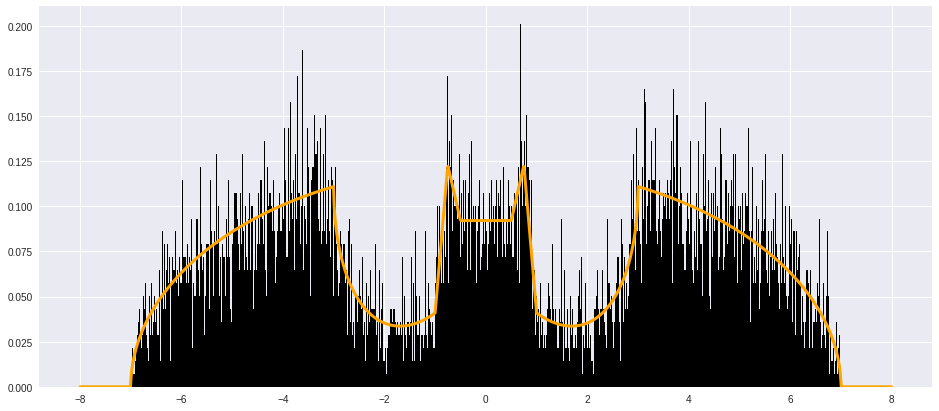

In [19]:
sim = MH(f,g)
sim.simulate(100000,record=10)
sim.observe()